In [1]:
from sheap.spectra_readers import parallel_reader 
from sheap.MainSheap import Sheapectral 
from sheap.RegionHandler.RegionBuilder import RegionBuilder
from sheap.RegionHandler.RegionFitting import RegionFitting
from sheap.Plotting.SheapPlot import SheapPlot
from sheap.Posterior.ParameterEstimation import ParameterEstimation


In [2]:
import jax 
from jax import jit 
import jax.numpy as jnp
import glob 
import os 
import pandas as pd 
import matplotlib.pyplot as plt 
from paths_func import cross_pandas_spectra
jax.config.update("jax_enable_x64", True)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
path_dr16 = "/home/favila/smbh_mass/dr16"
#path_dr16 = "/home/felipe/work/SMBH_estimation/dr16"

In [5]:
#file_paths,objs_panda  = cross_pandas_spectra(path_dr16,"sdss_fits","dr16_pandas.csv")
#objs_panda_sort =objs_panda
from astropy.io import fits 
file_paths,objs_panda = cross_pandas_spectra(path_dr16,"new_sub_sample_sdss_fits","subsample_07_03_25_full.csv")
n_pixels = [fits.open(i)[1].header["NAXIS2"] for i in objs_panda.fit_path.values]
objs_panda["NAXIS2"] = n_pixels
#objs_panda_sort = objs_panda[objs_panda.NAXIS2 == 4636 & objs_panda.Z_FIT<1.0]#.sort_values("SN_MEDIAN_ALL",ascending=False)#[:1500][:100][:10]
#objs_panda_sort = objs_panda_sort.reset_index(drop=True)

You cross match found 11538


In [104]:
objs_panda_sort = objs_panda[(objs_panda.NAXIS2 == 4590) & (objs_panda.Z_FIT>0.5)].sort_values("SN_MEDIAN_ALL",ascending=False)

In [105]:
objs_panda_sort

,Unnamed: 0,SDSS_NAME,Z_DR16Q,FHOST_5100,Z_FIT,PLATE,MJD,FIBERID,RA,DEC,...,LOGL3000,LOGLBOL,LOGMBH_HB,LOGMBH_MGII,LOGMBH_CIV,LOGMBH,LOGLEDD_RATIO,dr_name,fit_path,NAXIS2
6584,436334,124718.68+402129.5,1.544057,0.0,1.544057,8836,57424,912,191.827857,40.358195,...,45.475847,46.187654,0.0,8.897400,0.000000,8.897400,-0.823689,8836-57424-0912,/home/favila/smbh_mass/dr16/new_sub_sample_sds...,4590
9604,622126,162822.01+544802.8,1.451908,0.0,1.451908,8061,58253,642,247.091730,54.800791,...,45.352042,46.063849,0.0,8.843567,0.000000,8.843567,-0.893661,8061-58253-0642,/home/favila/smbh_mass/dr16/new_sub_sample_sds...,4590
5282,350126,111334.32+514522.8,1.437872,0.0,1.437872,8160,57071,556,168.393007,51.756334,...,45.282492,45.994299,0.0,8.731744,0.000000,8.731744,-0.851389,8160-57071-0556,/home/favila/smbh_mass/dr16/new_sub_sample_sds...,4590
553,28938,003231.25-033526.6,0.824766,0.0,0.824766,7904,57358,548,8.130245,-3.590733,...,44.798045,45.509852,0.0,8.161518,0.000000,8.161518,-0.765609,7904-57358-0548,/home/favila/smbh_mass/dr16/new_sub_sample_sds...,4590
4893,308909,103053.04+382526.1,1.239572,0.0,1.239572,8853,57459,675,157.721028,38.423930,...,45.199382,45.911189,0.0,9.258071,0.000000,9.258071,-1.460824,8853-57459-0675,/home/favila/smbh_mass/dr16/new_sub_sample_sds...,4590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,5814,000613.95+242331.0,2.531720,0.0,2.531720,7665,57328,844,1.558158,24.391949,...,0.000000,45.528615,0.0,0.000000,8.161951,8.161951,-0.747279,7665-57328-0844,/home/favila/smbh_mass/dr16/new_sub_sample_sds...,4590
5750,384505,115042.43+324321.6,0.809951,0.0,0.809951,10261,58462,182,177.676810,32.722671,...,43.441567,44.153374,0.0,8.020035,0.000000,8.020035,-1.980604,10261-58462-0182,/home/favila/smbh_mass/dr16/new_sub_sample_sds...,4590
1324,72872,011955.29-035205.6,1.138000,0.0,1.138000,7914,57331,900,19.980411,-3.868229,...,43.963202,44.675010,0.0,7.875882,0.000000,7.875882,-1.314816,7914-57331-0900,/home/favila/smbh_mass/dr16/new_sub_sample_sds...,4590
896,50296,005525.05+003142.8,2.676000,0.0,2.676000,7872,57279,724,13.854391,0.528576,...,0.000000,45.440852,0.0,0.000000,8.101122,8.101122,-0.774213,7872-57279-0724,/home/favila/smbh_mass/dr16/new_sub_sample_sds...,4590


**systems that will be use to test**
- Constins halpha hbeta power law '/home/favila/smbh_mass/dr16/new_sub_sample_sdss_fits/8222-57431-0561.fits'
- host dominated '/home/favila/smbh_mass/dr16/new_sub_sample_sdss_fits/8363-58140-0132.fits'

In [106]:
#objs_panda_sort.values[8]

In [107]:
len(objs_panda_sort)

210

In [108]:
#objs_panda.value_counts("NAXIS2")

In [109]:
# import numpy as np 
# def fits_reader_sdss(file):
#     """
#     Read an SDSS FITS file and extract wavelength, flux, and inverse variance,
#     scaled appropriately by the BUNIT header.
#     """
#     hdul = fits.open(file)
#     flux_scale = float(hdul[0].header["BUNIT"].split(" ")[0])
#     data_array = np.array([
#         10**hdul[1].data["loglam"],
#         hdul[1].data["flux"] * flux_scale,
#         flux_scale / np.sqrt(hdul[1].data["ivar"])
#     ])
#     header_array = np.array([
#         hdul[0].header["PLUG_RA"],
#         hdul[0].header["PLUG_DEC"]
#     ])
#     return data_array, header_array

In [110]:
# shapes = [fits_reader_sdss(file)[0].shape for file in objs_panda_sort.fit_path.values]

In [111]:
coords,spectra_reshaped,_ = parallel_reader(objs_panda_sort.fit_path.values)
coords = jnp.array(coords)
spectra_reshaped = jnp.array(spectra_reshaped)

/home/favila/smbh_mass/sheap/sheap/spectra_readers.py:22: RuntimeWarning: divide by zero encountered in divide
  flux_scale / np.sqrt(hdul[1].data["ivar"])
/home/favila/smbh_mass/sheap/sheap/spectra_readers.py:22: RuntimeWarning: divide by zero encountered in divide
  flux_scale / np.sqrt(hdul[1].data["ivar"])
/home/favila/smbh_mass/sheap/sheap/spectra_readers.py:22: RuntimeWarning: divide by zero encountered in divide
  flux_scale / np.sqrt(hdul[1].data["ivar"])
/home/favila/smbh_mass/sheap/sheap/spectra_readers.py:22: RuntimeWarning: divide by zero encountered in divide
  flux_scale / np.sqrt(hdul[1].data["ivar"])
/home/favila/smbh_mass/sheap/sheap/spectra_readers.py:22: RuntimeWarning: divide by zero encountered in divide
  flux_scale / np.sqrt(hdul[1].data["ivar"])
/home/favila/smbh_mass/sheap/sheap/spectra_readers.py:22: RuntimeWarning: divide by zero encountered in divide
  flux_scale / np.sqrt(hdul[1].data["ivar"])
/home/favila/smbh_mass/sheap/sheap/spectra_readers.py:22: Runtim

In [112]:
test_clase = Sheapectral(spectra_reshaped,z=objs_panda_sort["Z_DR16Q"].values,coords = coords)
z_s=test_clase.z
#norm_factor=10**test_clase.spectra_exp
exp_factor = test_clase.spectra_exp
Spectra = test_clase.spectra

In [113]:
#spectra_reshaped[1]

In [114]:
# from sheap.RegionHandler.RegionBuilderv2 import RegionBuilderv2
# from sheap.RegionHandler.RegionFittingv2 import RegionFittingv2,is_list_of_SpectralLine
# from sheap.RegionHandler.suportclass import SpectralLine

In [210]:
region = RegionBuilder(1200, 4000,template_mode_fe=False,n_broad=1,add_outflow=True,by_region=True,force_linear=False)

In [184]:
# power_test = {'complex_region':[region.regions_to_fit[-1]],'outer_limits':region._fitting_rutine(add_step=False)['outer_limits'],
#               "inner_limits":region._fitting_rutine(add_step=False)['inner_limits'],
#               "fitting_rutine":{'step1': {'tied':[],"non_optimize_in_axis":3}}}

In [185]:
region._fitting_rutine()["fitting_rutine"]

{'step1': {'tied': [['center_FeVIIa_20_fe', 'center_FeVa_20_fe'],
   ['width_FeVIIa_20_fe', 'width_FeVa_20_fe'],
   ['center_FeVb_20_fe', 'center_FeVa_20_fe'],
   ['width_FeVb_20_fe', 'width_FeVa_20_fe'],
   ['center_FeVc_20_fe', 'center_FeVa_20_fe'],
   ['width_FeVc_20_fe', 'width_FeVa_20_fe'],
   ['center_uvfe60a_20_fe', 'center_uvfe61d_20_fe'],
   ['width_uvfe60a_20_fe', 'width_uvfe61d_20_fe'],
   ['center_uvfe60b_20_fe', 'center_uvfe61d_20_fe'],
   ['width_uvfe60b_20_fe', 'width_uvfe61d_20_fe'],
   ['center_uvfe60c_20_fe', 'center_uvfe61d_20_fe'],
   ['width_uvfe60c_20_fe', 'width_uvfe61d_20_fe'],
   ['center_uvfe60d_20_fe', 'center_uvfe61d_20_fe'],
   ['width_uvfe60d_20_fe', 'width_uvfe61d_20_fe'],
   ['center_uvfe60e_20_fe', 'center_uvfe61d_20_fe'],
   ['width_uvfe60e_20_fe', 'width_uvfe61d_20_fe'],
   ['center_uvfe60f_20_fe', 'center_uvfe61d_20_fe'],
   ['width_uvfe60f_20_fe', 'width_uvfe61d_20_fe'],
   ['center_uvfe60g_20_fe', 'center_uvfe61d_20_fe'],
   ['width_uvfe60g_20_fe',

In [211]:
aja = RegionFitting(region._fitting_rutine(num_steps_list=[3000,3000]))
#aja(Spectra,renormalize=False)
#aja._build_fit_componentsv2()

TypeError: float() argument must be a string or a real number, not 'NoneType'

In [148]:
aja.params

Array([[ 3.23462856e+00,  9.00339269e-01,  2.21245617e-02, ...,
         1.79849987e+01, -1.83995069e+00,  8.91715042e-01],
       [ 3.08458560e+00,  9.30252982e-01,  1.33300057e-02, ...,
         1.32297964e+01, -1.89359981e+00,  6.84000386e-01],
       [ 3.50000000e+00,  1.90036996e+00,  2.53127970e-02, ...,
         1.57982836e+01, -2.14669591e+00,  1.01393380e+00],
       ...,
       [ 2.80610341e+00, -3.33787789e-02,  1.51771874e-03, ...,
         1.14939759e+01, -7.43853375e-01,  5.00612328e-02],
       [ 3.50000000e+00,  2.54157645e+00,  2.15931952e-03, ...,
         1.08438525e+01, -9.59609958e-01,  1.26466666e-02],
       [ 3.50000000e+00,  9.76127655e-01,  3.20982349e-03, ...,
         7.29097726e+00, -1.55281735e+00,  1.00815200e-02]],      dtype=float64)

In [185]:
aja.params

Array([[ 3.34843891e+00,  2.70262215e-01,  2.22868077e-03, ...,
         7.78965053e+01, -1.59266836e+00,  2.78648273e+00],
       [ 3.23372350e+00,  1.34205251e+00,  4.65781456e-04, ...,
         6.16710863e+01, -7.77205561e-01,  5.74639950e-01],
       [ 2.97153342e+00,  5.01472888e-01,  1.77573139e-03, ...,
         2.95726405e+01, -6.34091733e-01,  1.86737922e-01],
       ...,
       [ 3.50000000e+00,  4.15517924e+00,  1.94404940e-03, ...,
         9.36117754e+00, -2.57427310e-01,  2.76360132e-01],
       [ 3.50000000e+00,  2.86199486e+00,  9.96350677e-04, ...,
         9.30376474e+00, -6.72576718e-01,  1.20883714e-01],
       [ 3.50000000e+00,  2.34527623e+00,  1.25927509e-04, ...,
         9.30376474e+00,  0.00000000e+00,  5.16960700e-02]],      dtype=float64)

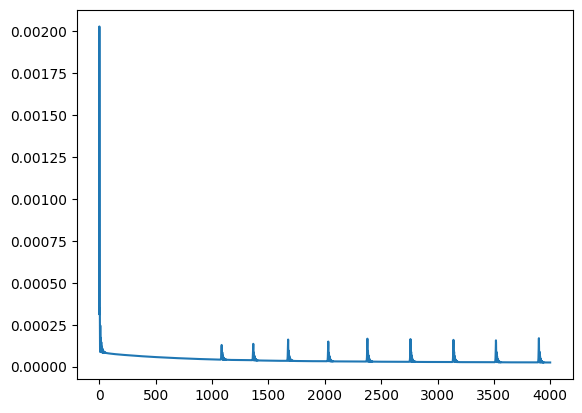

In [186]:
import numpy as np 
plt.plot(np.array(aja.loss).T[0])
#plt.ylim(0,1e-3)

In [187]:
from jax import jit,vmap
from sheap.Fitting.utils import combine_auto
ff = aja.mapping_lines("kind","fe")
profile_functions = list(ff["profile_functions"])
id_params = list(ff["profile_params_index_list"])
combine = jit(combine_auto(profile_functions))
comb_v = vmap(jit(combine_auto(profile_functions)),in_axes=(0,0))
Fe_2 = comb_v(aja.spec[:,0,:],aja.params[:,id_params])

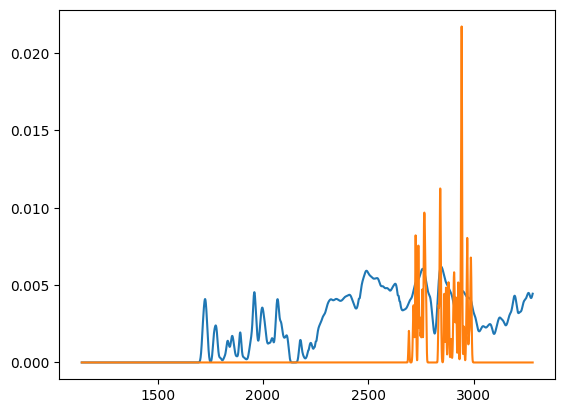

In [188]:
n = 8
plt.plot(aja.spec[:,0,:][n],Fe[n])
plt.plot(aja.spec[:,0,:][n],Fe_2[n])

In [153]:

region_plot = SheapPlot(aja)


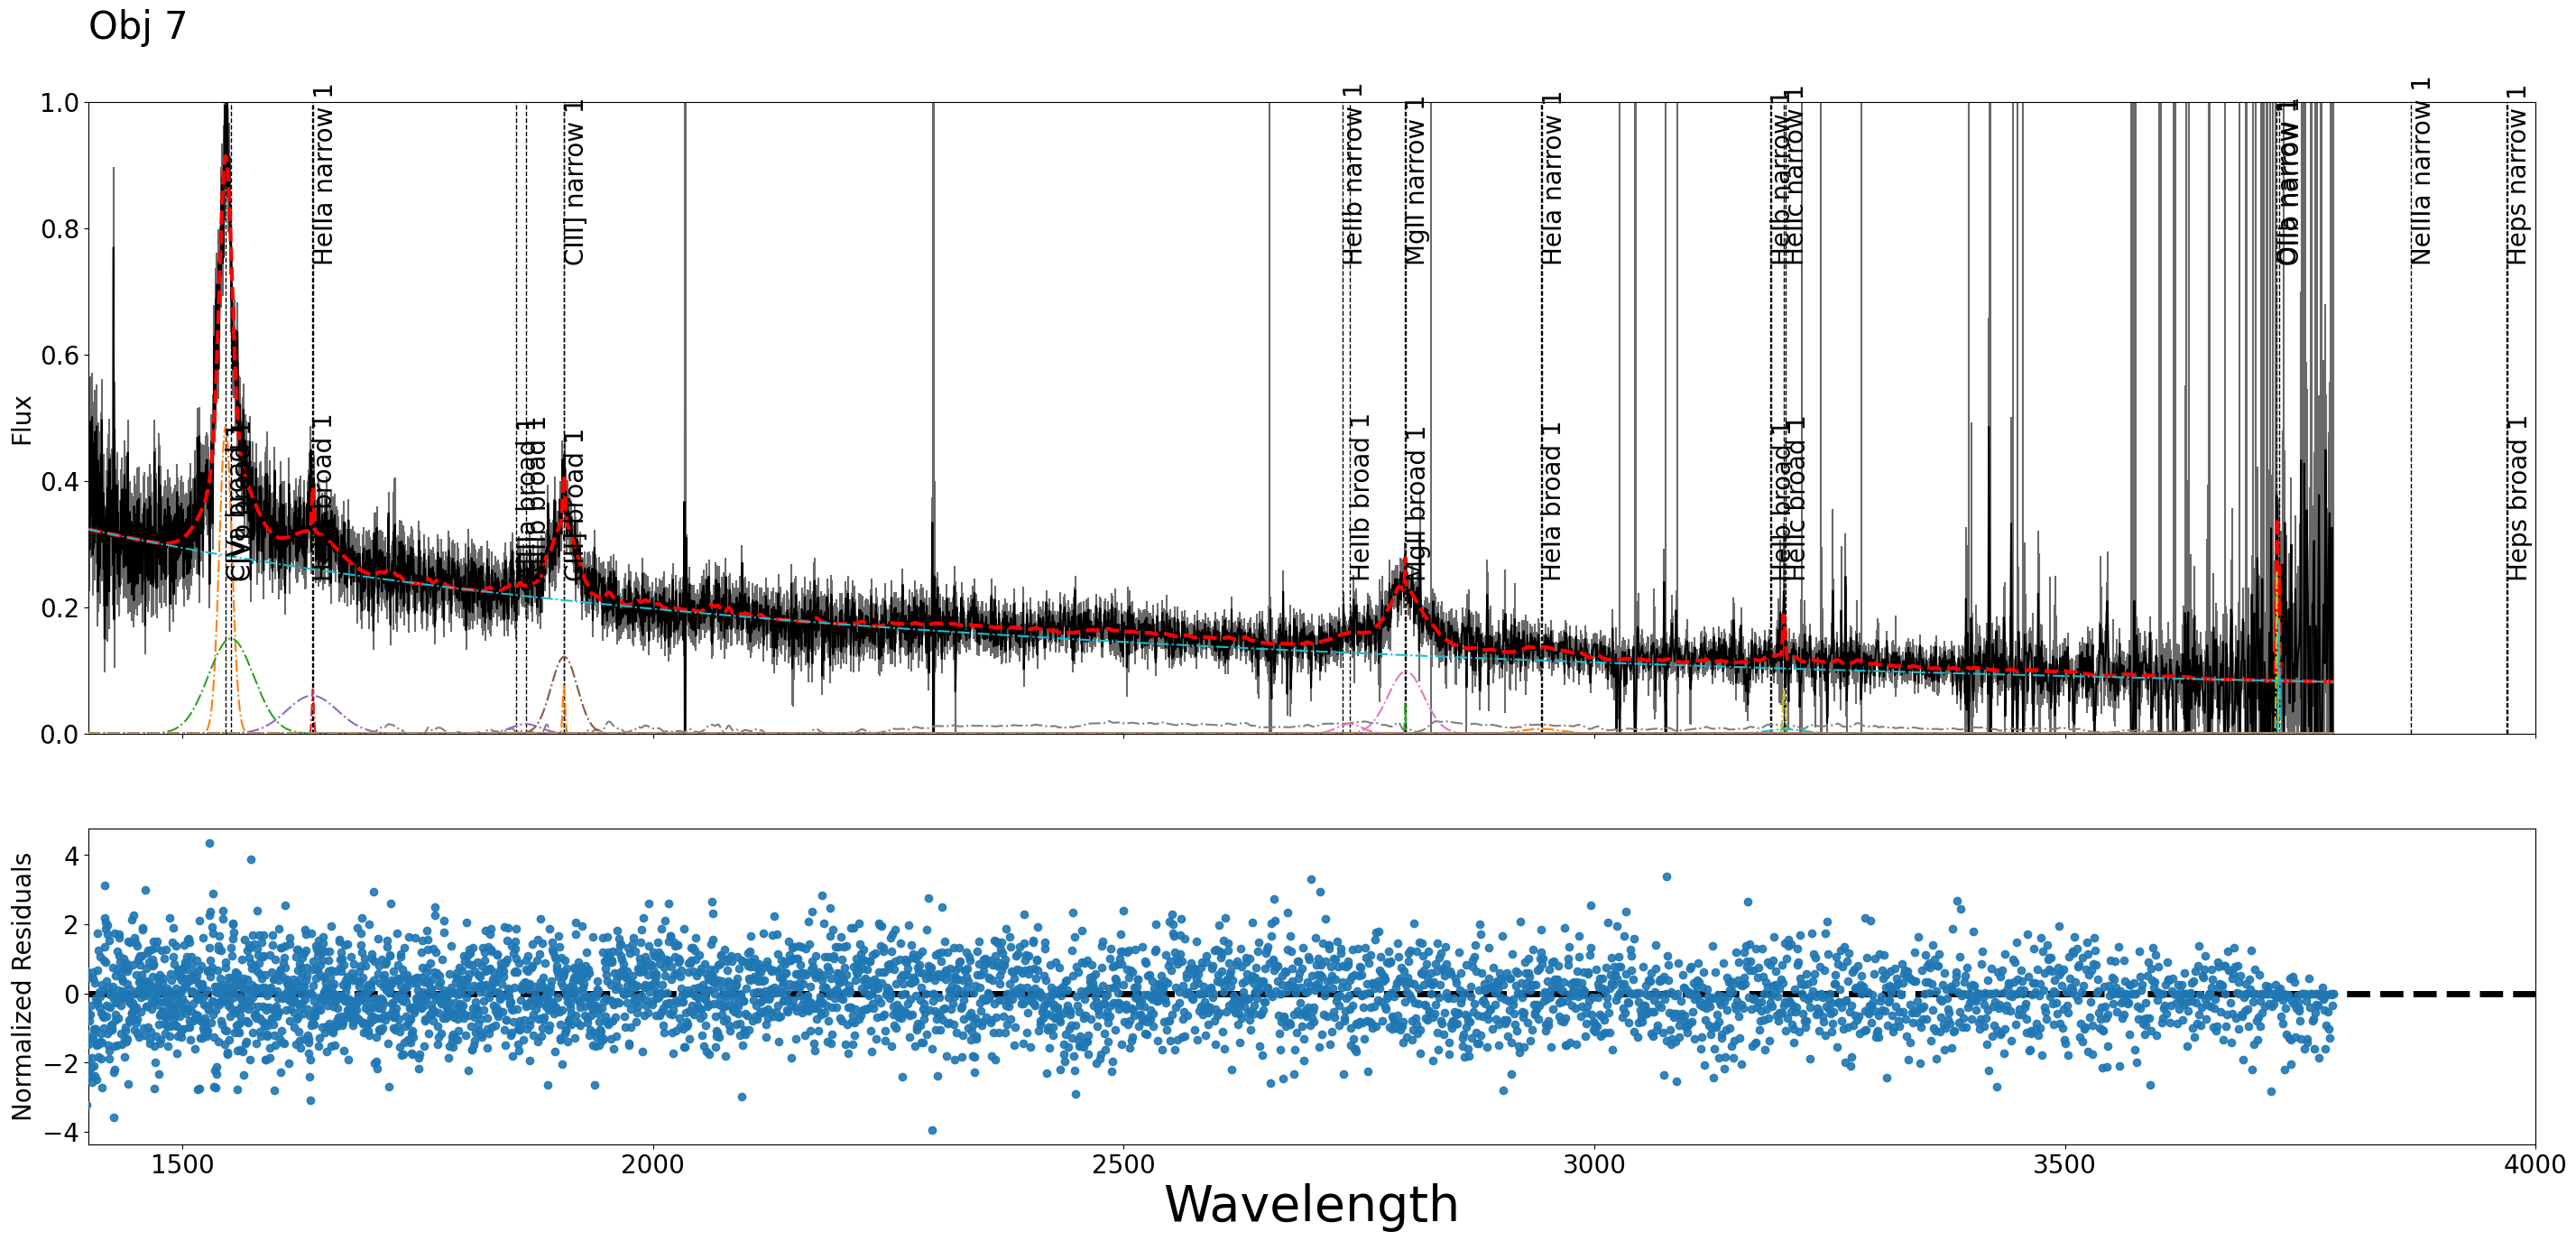

In [180]:
n = 8
region_plot.plot(n,xlim=[1400, 4000],add_name=True,ylim=[0,1])#207

In [ ]:
# aja.region_defs_["fitting_rutine"]["step1"]['tied']

[['center_FeIIa_20_fe', 'center_FeIIh_20_fe'],
 ['width_FeIIa_20_fe', 'width_FeIIh_20_fe'],
 ['center_FeIIb_20_fe', 'center_FeIIh_20_fe'],
 ['width_FeIIb_20_fe', 'width_FeIIh_20_fe'],
 ['center_FeIIc_20_fe', 'center_FeIIh_20_fe'],
 ['width_FeIIc_20_fe', 'width_FeIIh_20_fe'],
 ['center_FeIId_20_fe', 'center_FeIIh_20_fe'],
 ['width_FeIId_20_fe', 'width_FeIIh_20_fe'],
 ['center_FeIIe_20_fe', 'center_FeIIh_20_fe'],
 ['width_FeIIe_20_fe', 'width_FeIIh_20_fe'],
 ['center_FeIIf_20_fe', 'center_FeIIh_20_fe'],
 ['width_FeIIf_20_fe', 'width_FeIIh_20_fe'],
 ['center_FeIIg_20_fe', 'center_FeIIh_20_fe'],
 ['width_FeIIg_20_fe', 'width_FeIIh_20_fe'],
 ['center_FeIIi_20_fe', 'center_FeIIh_20_fe'],
 ['width_FeIIi_20_fe', 'width_FeIIh_20_fe'],
 ['center_FeIIj_20_fe', 'center_FeIIh_20_fe'],
 ['width_FeIIj_20_fe', 'width_FeIIh_20_fe'],
 ['center_FeIIk_20_fe', 'center_FeIIh_20_fe'],
 ['width_FeIIk_20_fe', 'width_FeIIh_20_fe'],
 ['center_FeIIl_20_fe', 'center_FeIIh_20_fe'],
 ['width_FeIIl_20_fe', 'width_FeI

In [31]:
aja._build_tied(aja.region_defs_["fitting_rutine"]["step1"]['tied'])

['106 127 -212.91599999999926',
 '107 128 *1',
 '109 127 -182.2569999999996',
 '110 128 *1',
 '112 127 -160.59999999999945',
 '113 128 *1',
 '115 127 -138.34399999999914',
 '116 128 *1',
 '118 127 -17.321999999999207',
 '119 128 *1',
 '121 127 -6.391999999999825',
 '122 128 *1',
 '124 127 -3.0869999999995343',
 '125 128 *1',
 '130 127 +28.720000000000255',
 '131 128 *1',
 '133 127 +37.05000000000018',
 '134 128 *1',
 '136 127 +108.95500000000084',
 '137 128 *1',
 '139 127 +499.33700000000044',
 '140 128 *1',
 '142 127 +737.317',
 '143 128 *1',
 '145 127 +764.3590000000004',
 '146 128 *1',
 '148 127 +795.9530000000004',
 '149 128 *1',
 '46 73 -530.1799999999994',
 '47 74 *1',
 '49 73 -375.0102999999999',
 '50 74 *1',
 '52 73 -353.9262999999992',
 '53 74 *1',
 '55 73 -284.4299999999994',
 '56 74 *1',
 '58 73 -244.23999999999978',
 '59 74 *1',
 '61 73 -231.21999999999935',
 '62 74 *1',
 '64 73 -202.35999999999967',
 '65 74 *1',
 '67 73 -49.10999999999967',
 '68 74 *1',
 '70 73 -39.4099999

In [ ]:
# region = RegionBuilder(4400, 5600)
# region.make_region(verbose=True,Fe_regions=['Fe_uv',"FeII_IZw1","feII_forbidden","FeII_coronal"],force_linear=True
#                    ,n_broad = 2,n_narrow =1,narrow_plus=False,add_out_flow=True,tied_narrow_to="OIIIc",template_mode_Fe=False)
# Hbeta_class = RegionFitting(region.to_complex(add_free=True))

We assume a local linear continuum


In [ ]:
class BalCon(model.RegriddableModel1D):
    def __init__(self, name="BalCon"):
        self.A = model.Parameter(name, "A", 1, min=tinyval, hard_min=0)
        self.T = model.Parameter(
            name, "T", 10000, min=5000, frozen=False, units="kelvins"
        )
        self.tau = model.Parameter(
            name, "tau", 1, min=0.01, hard_min=tinyval, max=2)

        model.RegriddableModel1D.__init__(
            self, name, (self.A, self.T, self.tau))

    def calc(self, pars, x, *args, **kwargs):
        """Evaluate the model"""
        return _balmer_conti(pars, x)

In [207]:
import jax.numpy as jnp
from jax import jit

@jit
def balmer_conti_jax(x,pars):
    """
    Compute the Balmer continuum (Dietrich+02) in pure JAX.

    Parameters
    ----------
    x : array-like
        Wavelengths in Angstrom.
    pars : array-like, shape (3,)
        pars[0] = A (amplitude)
        pars[1] = T (temperature in K)
        pars[2] = τ0 (optical‐depth scale)
   

    Returns
    -------
    result : ndarray
        Balmer continuum flux in the same shape as x.
    """
    # Constants
    h   = 6.62607015e-34   # Planck’s constant, J·s
    c   = 2.99792458e8     # Speed of light, m/s
    k_B = 1.380649e-23     # Boltzmann constant, J/K

    # Edge
    lambda_BE = 3646.0  # Å

    # Convert Å → m
    lam_m = x * 1e-10

    # Planck function B_λ(lam_m, T) [SI units]
    T = pars[1]
    exponent = h * c / (lam_m * k_B * T)
    B_lambda = (2.0 * h * c**2) / (lam_m**5 * (jnp.exp(exponent) - 1.0))

    # Apply the same “scale=10000” factor as in astropy’s BlackBody
    B_lambda *= 1e5

    # Optical depth τ(λ)
    tau = pars[2] * (x / lambda_BE)**3

    # Balmer-continuum formula
    result = pars[0] * B_lambda * (1.0 - jnp.exp(-tau))

    # Zero above the Balmer edge
    result = jnp.where(x > lambda_BE, 0.0, result)/1e18 #factor the normalisacion

    return result


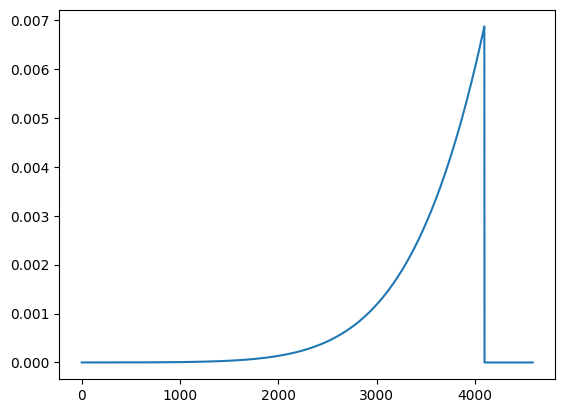

In [209]:
plt.plot(balmer_conti_jax(aja.spec[:,0,:],jnp.array([1,5000,0.01]))[0])